# Project for Programming for DA
## Vitalijs Smirnovs
## ID: G00317774
### Lecturer: Dr. Brian McGinley

Data to be simulated:
Earnings in Galway county by age, gender and marital status.

Sources of original data: [(CSO.ie, 2019a,](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=NSA87&PLanguage=0) [CSO.ie, 2019b)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#)

Four variables to be simulated:
- age
- gender
- marital status
- earnings

The hypothesis is that there are differences in the varibles by gender. So Gender is the first variable to be generated.
To know how many observations to simulate, I checked the CSO.ie data and Galway County (including Galway City) had a population of 258,058 people as counted in the last 2016 Srnsus of population.[(CSO.ie, 2019c)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=E2028&TabStrip=Select&PLanguage=0&FF=1#)

The population of 258,058 people includes 127,663 Males and 130,395 Females, in proportions:
Male	0.494706616; 
Female	0.505293384. [(CSO.ie, 2019d)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp])

In [1]:
# import needed packages
import pandas as pd
import seaborn as sn
import numpy as np

In [50]:
# randomly choose male or female with probabilities 0.49 for male and 0.51 for female
gender = np.random.choice(['Male','Female'],77417, p=[0.49,0.51], replace=True)
# how many values are generated?
print(len(gender))
# record values into the dataframe
df = pd.DataFrame(data=gender, columns=['gender'])
# view the head of dataframe
df.head()

77417


,gender
0,Male
1,Female
2,Male
3,Female
4,Female


In [51]:
df2=df['gender'].value_counts()
df2

Female    39382
Male      38035
Name: gender, dtype: int64

Two variable of remaning three will presumably depend on age - marital status and earnings. So age is the next variable to be simulated.

### Age
[(CSO.ie, 2019e)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp)



Age Group | N  | Proportion|  
----------|----:|--------:|
All ages	       | 258058	  |
0 - 4 years	       | 17799	|0.068972867
5 - 9 years	       | 18885	|0.073181223
10 - 14 years	   | 17198	|0.066643933
15 - 19 years	   | 16600	|0.064326624
20 - 24 years	   | 16470	|0.063822862
25 - 29 years	   | 15304	|0.059304497
30 - 34 years	   | 18859	|0.07308047
35 - 39 years	   | 21175	|0.082055197
40 - 44 years	   | 19420	|0.0752544
45 - 49 years	   | 17691	|0.068554356
50 - 54 years	   | 15796	|0.061211046
55 - 59 years	   | 14639	|0.056727557
60 - 64 years	   | 13316	|0.051600803
65 - 69 years	   | 11434	|0.044307869
70 - 74 years	   | 8808	|0.034131862
75 - 79 years	   | 6239	|0.024176735
80 - 84 years	   | 4479	|0.017356563
85 years and over  | 3946	|0.015291136

In [52]:
a = (np.random.randint(0, 5, 5340))
print(len(a))
# a is an array, we want to use extend funfrion, so needs to be converted to list
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
age = list(a)
len(age) 
# extend the list
# https://stackabuse.com/append-vs-extend-in-python-lists/
# similar proportion fall into 10-25 categories, so group together
# also 45-54, 55-61 and 80+
age.extend(np.random.randint(5, 10,  56657))
print(len(age))
age.extend(np.random.randint(10, 25, 15080))
print(len(age)) 
age.extend(np.random.randint(25, 30, 4591))
print(len(age))
age.extend(np.random.randint(30, 35, 5657))
print(len(age))
age.extend(np.random.randint(35, 40, 6352))
print(len(age))
age.extend(np.random.randint(40, 45, 5826)) 
print(len(age)) 
age.extend(np.random.randint(45, 55, 10046))
age.extend(np.random.randint(55, 65, 8386)) 
age.extend(np.random.randint(65, 70, 3430)) 
age.extend(np.random.randint(70, 75, 2642))           
age.extend(np.random.randint(75, 79, 1871))           
age.extend(np.random.randint(80, 100, 2527))     
len(age)  
#print(age)

5340
61997
77077
81668
87325
93677
99503


128405

In [36]:
# shuffle the list, to insure it is random
age1=np.random.shuffle(age)
# write into a dataframe column
# https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list
df['age']= age
df
df['age'].describe()


ValueError: Length of values does not match length of index

### Marital Status
Judging from CSO.ie that marital status dependent on both age and gender. Inparticular, it is reported that: "There were 94,924 men and 127,149 women separated or divorced in 2016. Figure 1.4 shows the age and sex breakdown of the separated or divorced population for 2011 and 2016. There were nearly 90% more separated or divorced women (7,244) than men (3,830) in the 25-34 age group. The proportionate difference between sexes reduces with age, and for persons aged 65 years and over, there are 4% more women (18,743) than men (18,097) separated or divorced." [(CSO.ie, 2019f)](https://www.cso.ie/en/releasesandpublications/ep/p-cp4hf/cp4hf/ms/)

The figure, mentioned in the quated paragraph confirms:

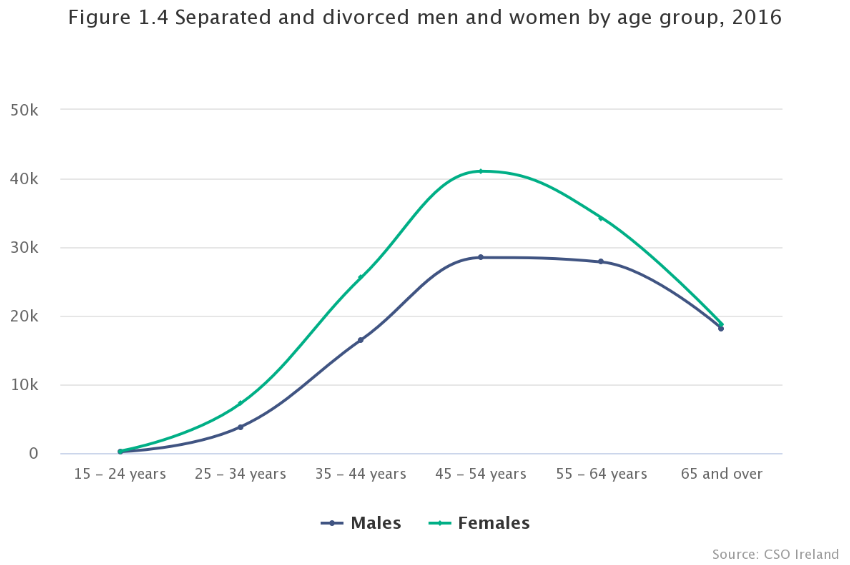



CSO.ie reports by Single Year of Age, Sex, Marital Status and CensusYear: [(CSO.ie, 2019)](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3011&PLanguage=0)

In [ ]:
# adapted from: https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe
# add an empty column to data frame for marital status
df['marital'] = np.nan
# view df
df.head()


In [7]:
# calculate number of people in each age group by gender
# this will determin the length of the array with random marital statuses generated
# Males
age_0_14m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=0 and x['age']<=14 else False, axis=1)
age_15_19m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=15 and x['age']<=19  else False, axis=1)
age_20_24m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=20 and x['age']<=24  else False, axis=1)
age_25_29m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=25 and x['age']<=29  else False, axis=1)
age_30_34m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=30 and x['age']<=34  else False, axis=1)
age_35_39m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=35 and x['age']<=39  else False, axis=1)
age_40_44m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=40 and x['age']<=44  else False, axis=1)
age_45_49m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=45 and x['age']<=49  else False, axis=1)
age_50_54m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=50 and x['age']<=54  else False, axis=1)
age_55_59m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=55 and x['age']<=59  else False, axis=1)
age_60_64m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=60 and x['age']<=64  else False, axis=1)
age_65_100m=df.apply(lambda x: True if x['gender']=="Male" and x['age']>=65 and x['age']<=100 else False, axis=1)

#Females
age_0_14f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=0 and x['age']<=14 else False, axis=1)
age_15_19f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=15 and x['age']<=19  else False, axis=1)
age_20_24f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=20 and x['age']<=24  else False, axis=1)
age_25_29f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=25 and x['age']<=29  else False, axis=1)
age_30_34f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=30 and x['age']<=34  else False, axis=1)
age_35_39f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=35 and x['age']<=39  else False, axis=1)
age_40_44f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=40 and x['age']<=44  else False, axis=1)
age_45_49f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=45 and x['age']<=49  else False, axis=1)
age_50_54f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=50 and x['age']<=54  else False, axis=1)
age_55_59f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=55 and x['age']<=59  else False, axis=1)
age_60_64f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=60 and x['age']<=64  else False, axis=1)
age_65_100f=df.apply(lambda x: True if x['gender']=="Female" and x['age']>=65 and x['age']<=100 else False, axis=1)


In [8]:
#Males
Nage_0_14m=len(age_0_14m[age_0_14m==True].index)
Nage_15_19m=len(age_15_19m[age_15_19m==True].index)
Nage_20_24m=len(age_20_24m[age_20_24m==True].index)
Nage_25_29m=len(age_25_29m[age_25_29m==True].index)
Nage_30_34m=len(age_30_34m[age_30_34m==True].index)
Nage_35_39m=len(age_35_39m[age_35_39m==True].index)
Nage_40_44m=len(age_40_44m[age_40_44m==True].index)
Nage_45_49m=len(age_45_49m[age_45_49m==True].index)
Nage_50_54m=len(age_50_54m[age_50_54m==True].index)
Nage_55_59m=len(age_55_59m[age_55_59m==True].index)
Nage_60_64m=len(age_60_64m[age_60_64m==True].index)
Nage_65_100m=len(age_65_100m[age_65_100m==True].index)

#Females
Nage_0_14f=len(age_0_14f[age_0_14f==True].index)
Nage_15_19f=len(age_15_19f[age_15_19f==True].index)
Nage_20_24f=len(age_20_24f[age_20_24f==True].index)
Nage_25_29f=len(age_25_29f[age_25_29f==True].index)
Nage_30_34f=len(age_30_34f[age_30_34f==True].index)
Nage_35_39f=len(age_35_39f[age_35_39f==True].index)
Nage_40_44f=len(age_40_44f[age_40_44f==True].index)
Nage_45_49f=len(age_45_49f[age_45_49f==True].index)
Nage_50_54f=len(age_50_54f[age_50_54f==True].index)
Nage_55_59f=len(age_55_59f[age_55_59f==True].index)
Nage_60_64f=len(age_60_64f[age_60_64f==True].index)
Nage_65_100f=len(age_65_100f[age_65_100f==True].index)

In [9]:
Nm=(Nage_0_14m + Nage_15_19m + Nage_20_24m + Nage_25_29m + Nage_30_34m + Nage_35_39m + Nage_40_44m + Nage_45_49m + Nage_55_59m + Nage_50_54m + Nage_60_64m + Nage_65_100m)
print(Nm)

Nf=(Nage_0_14f + Nage_15_19f + Nage_20_24f + Nage_25_29f + Nage_30_34f + Nage_35_39f + Nage_40_44f + Nage_45_49f + Nage_55_59f + Nage_50_54f + Nage_60_64f + Nage_65_100f)
print(Nf)

126305
131753


	Male:|	div_sep:|	married:|	single:|	other:|
age_	0 - 14 	0	0	1	0
age_	15 - 19	8.42111E-05	0.001457499	0.998257479	0.000200811
age_	20 - 24	0.00127905	0.015905018	0.981638051	0.001177882
age_	25 - 29	0.005186808	0.111092743	0.880799857	0.002920593
age_	30 - 34	0.017501449	0.365594203	0.6128	0.004104348
age_	35 - 39	0.033811406	0.563810303	0.398001648	0.004376643
age_	40 - 44	0.056368952	0.64789583	0.290011966	0.005723252
age_	45 - 49	0.080382587	0.678715848	0.232438621	0.008462945
age_	50 - 54	0.102525902	0.690702241	0.193383897	0.01338796
age_	55 - 59	0.112552682	0.701857848	0.162803976	0.022785495
age_	60 - 64	0.106006947	0.709478798	0.147995278	0.036518977
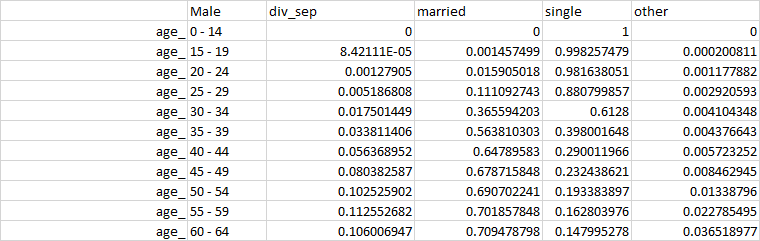

In [31]:
status = ['divorced', 'maried', 'single', 'other']
# Males
# due to fluctuations in array length due to rounding, generate lists of extra 0.01% length
# pop()can be performed on lists, not arrays, so generate lists of values
age_0_14ml=list(np.random.choice(status, size=int(Nage_0_14m*1.001) ,replace=True , 
                             p=[0.00, 0.00, 1.00, 0.00]))
age_15_19ml=list(np.random.choice(status, size=int(Nage_15_19m*1.001) ,replace=True ,
                             p=[0.000084211071813, 0.001457499319834, 0.998257478590954, 0.000200811017399]))
age_20_24ml=list(np.random.choice(status, size=int(Nage_20_24m*1.001), replace=True,
                             p=[0.001279049601110, 0.015905017921147, 0.981638050641693, 0.001177881836050]))
age_25_29ml=list(np.random.choice(status, size=int(Nage_25_29m*1.001) ,replace=True,
                             p=[0.005186807736816, 0.111092742602083, 0.880799856725630, 0.002920592935471]))
age_30_34ml=list(np.random.choice(status, size=int(Nage_30_34m*1.001) ,replace=True,
                             p=[0.017501449275362, 0.365594202898551, 0.612800000000000, 0.004104347826087]))
age_35_39ml=list(np.random.choice(status, size=int(Nage_35_39m*1.001) ,replace=True,
                             p=[0.033811405511212, 0.563810303478749, 0.398001647800920, 0.004376643209119]))
age_40_44ml=list(np.random.choice(status, size=int(Nage_40_44m*1.001 ),replace=True,
                             p=[0.056368952204637, 0.647895830040864, 0.290011965773373, 0.005723251981126]))
age_45_49ml=list(np.random.choice(status, size=int(Nage_45_49m*1.001) ,replace=True,
                             p=[0.080382586645166, 0.678715848171696, 0.232438620570803, 0.008462944612336]))
age_50_54ml=list(np.random.choice(status, size=int(Nage_50_54m*1.001) ,replace=True,
                             p=[0.102525902349834, 0.690702241484391, 0.193383896526038, 0.013387959639737]))
age_55_59ml=list(np.random.choice(status, size=int(Nage_55_59m*1.001) ,replace=True,
                             p=[0.112552681596562, 0.701857847961476, 0.162803975629362, 0.022785494812600]))
age_60_64ml=list(np.random.choice(status, size=int(Nage_60_64m*1.001) ,replace=True,
                             p=[0.106006947098440, 0.709478797761302, 0.147995278011329, 0.036518977128929]))
age_65_100ml=list(np.random.choice(status, size=int(Nage_65_100m*1.001) ,replace=True,
                              p=[0.060743408465403, 0.672058577776868, 0.146290186001694, 0.120907827756035]))

#Females   
age_0_14fl=list(np.random.choice(status, size=int(Nage_0_14f*1.001) ,replace=True,
                            p=[0.0000000000000, 0.0000000000000, 1.0000000000000, 0.0000000000000]))
age_15_19fl=list(np.random.choice(status, size=int(Nage_15_19f*1.001) ,replace=True,
                             p=[0.0001062304138, 0.0019586232538, 0.9977260052053, 0.0002091411271]))
age_20_24fl=list(np.random.choice(status, size=int(Nage_20_24f*1.001),replace=True,
                             p=[0.0016199513649, 0.0228329036623, 0.9744062311448, 0.0011409138281]))
age_25_29fl=list(np.random.choice(status, size=int(Nage_25_29f*1.001) ,replace=True,
                             p=[0.0078300115613, 0.1425513770776, 0.8470636613983, 0.0025549499628]))
age_30_34fl=list(np.random.choice(status, size=int(Nage_30_34f*1.001) ,replace=True,
                             p=[0.0239854344411, 0.4053460707962, 0.5664276079511, 0.0042408868116]))
age_35_39fl=list(np.random.choice(status, size=int(Nage_35_39f*1.001) ,replace=True,
                             p=[0.0437916328450, 0.5776815739631, 0.3732699418912, 0.0052568513007]))
age_40_44fl=list(np.random.choice(status, size=int(Nage_40_44f*1.001) ,replace=True,
                             p=[0.0697862957747, 0.6455169240954, 0.2762501613021, 0.0084466188277]))
age_45_49fl=list(np.random.choice(status, size=int(Nage_45_49f*1.001) ,replace=True,
                             p=[0.0997362403321, 0.6685645872638, 0.2184157800300, 0.0132833923741]))
age_50_54fl=list(np.random.choice(status, size=int(Nage_50_54f*1.001 ),replace=True,
                             p=[0.1223190561872, 0.6796303556051, 0.1753465416202, 0.0227040465875]))
age_55_59fl=list(np.random.choice(status, size=int(Nage_55_59f*1.001) ,replace=True,
                             p=[0.1276075358018, 0.6884341922278, 0.1450787247449, 0.0388795472255]))
age_60_64fl=list(np.random.choice(status, size=int(Nage_60_64f*1.001),replace=True,
                             p=[0.1140567513850, 0.6930562016323, 0.1287182306424, 0.0641688163403]))
age_65_100fl=list(np.random.choice(status, size=int(Nage_65_100f*1.001) ,replace=True,
                              p=[0.0911241579274, 0.6829335141295, 0.1190610139011, 0.1068813140420]))


In [32]:
#https://thispointer.com/python-how-to-remove-element-from-a-list-by-value-or-index-remove-vs-pop-vs-del/
# Males
for idx, val in enumerate(df.itertuples()):
    if (df.gender[idx] == 'Male') & (df.age[idx]>=0) & (df.age[idx]<=14) & (len(age_0_14ml)>0):
        df.loc[idx, 'marital']=age_0_14ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=15) & (df.age[idx]<=19) & (len(age_15_19ml)>0):
        df.loc[idx, 'marital']=age_15_19ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=20) & (df.age[idx]<=24) & (len(age_20_24ml)>0):
        df.loc[idx, 'marital']=age_20_24ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=25) & (df.age[idx]<=29) & (len(age_25_29ml)>0):
        df.loc[idx, 'marital']=age_25_29ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=30) & (df.age[idx]<=34) & (len(age_30_34ml)>0):
        df.loc[idx, 'marital']=age_30_34ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=35) & (df.age[idx]<=39) & (len(age_35_39ml)>0):
        df.loc[idx, 'marital']=age_35_39ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=40) & (df.age[idx]<=44) & (len(age_40_44ml)>0):
        df.loc[idx, 'marital']=age_40_44ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=45) & (df.age[idx]<=49) & (len(age_45_49ml)>0):
        df.loc[idx, 'marital']=age_45_49ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=50) & (df.age[idx]<=54) & (len(age_50_54ml)>0):
        df.loc[idx, 'marital']=age_50_54ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=55) & (df.age[idx]<=59) & (len(age_55_59ml)>0):
        df.loc[idx, 'marital']=age_55_59ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=60) & (df.age[idx]<=64) & (len(age_60_64ml)>0):
        df.loc[idx, 'marital']=age_60_64ml.pop()
    elif (df.gender[idx] == 'Male') & (df.age[idx]>=65) & (df.age[idx]<=100) & (len(age_65_100ml)>0):
        df.loc[idx, 'marital']=age_65_100ml.pop()
    
                    
    
df.head(50)

KeyboardInterrupt: 

In [21]:
if (df.age[idx]>=65) & (df.age[idx]<=100):
    print([df['age']>=65].value_counts())
    
df.head(50)

AttributeError: 'list' object has no attribute 'value_counts'

In [ ]:
df2=df['age'].value_counts()
df2
df3=df.groupby('age')['gender'].value_counts()
pd.set_option('display.max_rows', None)
df3

In [ ]:
df.tail()


Educatioanl attainment
Educational attainment by age and gender is available from (CSO.ie, 2019g)[https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EDQ01&PLanguage=0]